In [1]:
import requests
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [10]:
r=requests.get("https://classic.clinicaltrials.gov/api/query/full_studies")

In [5]:
url = 'https://clinicaltrials.gov/api/query/study_fields?'
params = '&expr=cancer+AND+AREA[CompletionDate]RANGE[2019,MAX]&min_rnk=1&max_rank=10&fmt=csv&NStudiesFound'
fields = '&fields=OverallStatus%2CCompletionDate%2CCompletionDateType%2CResultsFirstPostDate%2CPrimaryCompletionDate%2CDispFirstPostDate'
df = pd.read_csv(url + params + fields,skiprows=10)
df.colu

In [6]:
df

,Rank,OverallStatus,CompletionDate,CompletionDateType,ResultsFirstPostDate,PrimaryCompletionDate,DispFirstPostDate
0,1,Unknown status,"August 31, 2020",Anticipated,NaN,"June 30, 2020",NaN
1,2,Unknown status,June 2022,Anticipated,NaN,June 2021,NaN
2,3,Unknown status,"November 1, 2022",Anticipated,NaN,"November 1, 2021",NaN
3,4,Recruiting,December 2028,Anticipated,NaN,December 2028,NaN
4,5,Recruiting,"December 31, 2050",Anticipated,NaN,"December 31, 2050",NaN
5,6,Recruiting,"July 1, 2023",Anticipated,NaN,"July 1, 2023",NaN
6,7,Unknown status,"December 31, 2022",Anticipated,NaN,"December 31, 2022",NaN
7,8,Not yet recruiting,"December 31, 2024",Anticipated,NaN,"March 30, 2024",NaN
8,9,Recruiting,"July 1, 2024",Anticipated,NaN,"January 1, 2024",NaN
9,10,Unknown status,"March 31, 2022",Anticipated,NaN,"December 31, 2021",NaN


In [18]:
# the ammount of cancer clinical trials made ussing different types of endoscopies 
expr='cancer'
procedures= ["endoscopy", "colonoscopy","bronchoscopy","arthroscopy","cystoscopy","hysteroscopy"]
url='https://classic.clinicaltrials.gov/api/query/field_values?expr='
search_elig_crit='+AND+SEARCH[Study](AREA[EligibilityCriteria]'
search_date='+AND+AREA[CompletionDate]RANGE[2019,MAX])'
params='&field=Condition&fmt=xml'
cancer_values=[]
for procedure in procedures:
    cancer_values.append(int(pd.read_xml(url+expr+search_elig_crit+procedure+search_date+params).NStudiesFound.dropna()))
cancer_values

[1859, 821, 226, 11, 187, 47]

[Text(0.5, 1.0, 'Cancer clinical trials')]

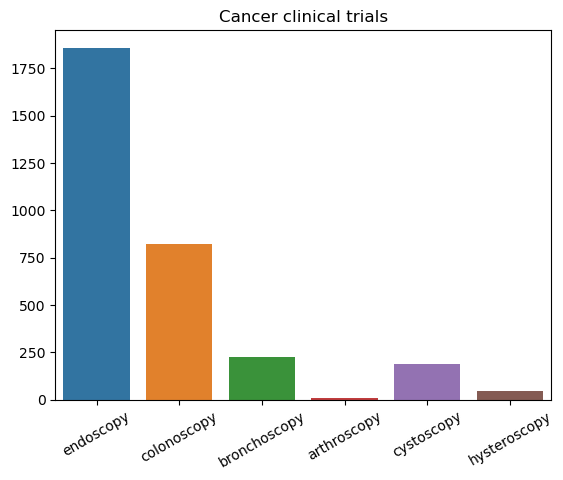

In [19]:
plot=sns.barplot(x=procedures, y=cancer_values)
plot.set_xticklabels(plot.get_xticklabels(), rotation=30)
plot.set(title="Cancer clinical trials")

In [24]:
expr='ALL'
procedures= ["endoscopy", "colonoscopy","bronchoscopy","arthroscopy","cystoscopy","hysteroscopy"]
url='https://classic.clinicaltrials.gov/api/query/field_values?expr='
search_elig_crit='+AND+SEARCH[Study](AREA[EligibilityCriteria]'
search_date='+AND+AREA[CompletionDate]RANGE[2019,MAX])'
params='&field=Condition&fmt=xml'
values=[]
for procedure in procedures:
    values.append(int(pd.read_xml(url+expr+search_elig_crit+procedure+search_date+params).NStudiesFound.dropna()))
values

[4055, 1526, 535, 474, 293, 231]

[Text(0.5, 1.0, 'All clinical trials')]

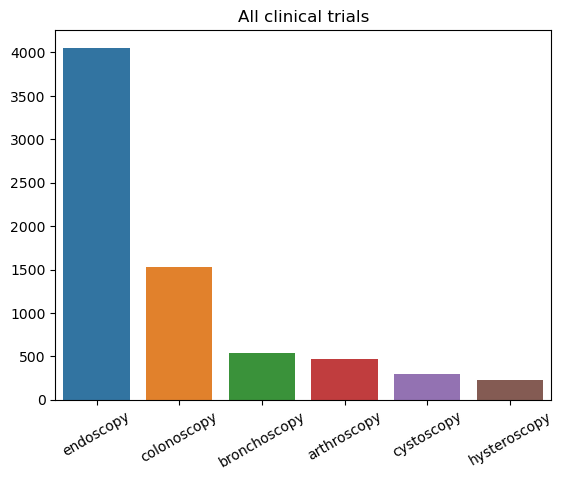

In [25]:
plot=sns.barplot(x=procedures, y=values)
plot.set_xticklabels(plot.get_xticklabels(), rotation=30)
plot.set(title='All clinical trials')

In [5]:
years= ["2015,2016","2017,2018","2019,2020","2021,2022","2023,2024"]
url='https://classic.clinicaltrials.gov/api/query/field_values?expr=ALL'
search_elig_crit='+AND+SEARCH[Study](AREA[EligibilityCriteria]'
search_years='+AND+AREA[CompletionDate]RANGE['
params='])&field=Condition&fmt=xml'
bronch_values, ar_values, cy_values, hy_values=[],[],[],[]
for year in years:
    bronch_values.append(int(pd.read_xml(url+search_elig_crit+'bronchoscopy'+search_years+year+params).NStudiesFound.dropna()))
    ar_values.append(int(pd.read_xml(url+search_elig_crit+'arthroscopy'+search_years+year+params).NStudiesFound.dropna()))
    cy_values.append(int(pd.read_xml(url+search_elig_crit+'cystoscopy'+search_years+year+params).NStudiesFound.dropna()))
    hy_values.append(int(pd.read_xml(url+search_elig_crit+'hysteroscopy'+search_years+year+params).NStudiesFound.dropna()))
print(bronch_values,ar_values,cy_values,hy_values,sep='\n')

[45, 59, 70, 59, 100]
[47, 41, 69, 61, 85]
[15, 25, 39, 30, 36]
[29, 31, 33, 34, 38]


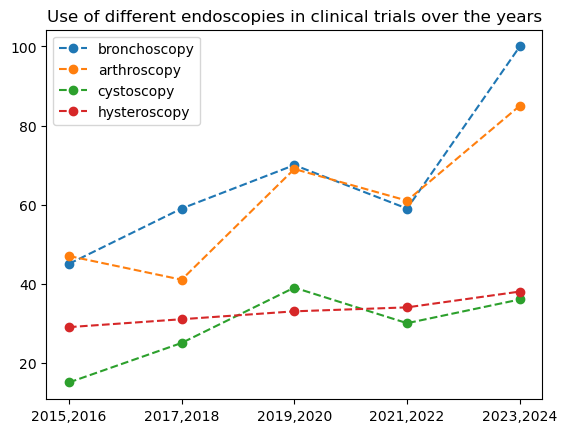

In [7]:
plt.plot(bronch_values,marker='o',linestyle='--',label='bronchoscopy')
plt.plot(ar_values,marker='o',linestyle='--',label='arthroscopy')
plt.plot(cy_values,marker='o',linestyle='--',label='cystoscopy')
plt.plot(hy_values,marker='o',linestyle='--',label='hysteroscopy')
plt.title('Use of different endoscopies in clinical trials over the years')
plt.legend()
plt.xticks(np.arange(len(years)),years)
plt.show()

In [41]:
url = 'https://clinicaltrials.gov/api/query/study_fields?'
params = '&expr=ALL+AND+AREA[CompletionDate]RANGE[2019,MAX]&min_rnk=1&max_rank=1000&fmt=csv&NStudiesFound'
fields = '&fields=OverallStatus'
df = pd.read_csv(url + params + fields,skiprows=10)
print(df['OverallStatus'].unique())

['Recruiting' 'Completed' 'Not yet recruiting' 'Enrolling by invitation']


In [51]:
params='&expr=ALL+AND+SEARCH[Study](AREA[OverallStatus]recruiting)&min_rnk=1&max_rank=1000&fmt=csv&NStudiesFound'
df = pd.read_csv(url + params + fields,skiprows=10)
print(df['OverallStatus'].unique())

['Recruiting']


In [71]:
params='&expr=ALL+AND+SEARCH[Study](AREA[OverallStatus]NOT+completed+AND+AREA[OverallStatus]NOT+invitation)&min_rnk=1&max_rank=1000&fmt=csv&NStudiesFound'
df = pd.read_csv(url + params + fields,skiprows=10)
print(df['OverallStatus'].unique())

['Recruiting' 'Not yet recruiting']


In [189]:
params='&expr=ALL+AND+SEARCH[Study](AREA[OverallStatus]re)&min_rnk=1&max_rank=1000&fmt=csv&NStudiesFound'
df = pd.read_csv(url + params + fields,skiprows=10)
print(df['OverallStatus'].unique())
# 2 letter search

[]


In [187]:
params='&expr=ALL+AND+SEARCH[Study](AREA[OverallStatus]unk)&min_rnk=1&max_rank=1000&fmt=csv&NStudiesFound'
df = pd.read_csv(url + params + fields,skiprows=10)
print(df['OverallStatus'].unique())
#first 3 letters search

['Unknown status']


In [190]:
params='&expr=ALL+AND+SEARCH[Study](AREA[OverallStatus]ing)&min_rnk=1&max_rank=1000&fmt=csv&NStudiesFound'
df = pd.read_csv(url + params + fields,skiprows=10)
print(df['OverallStatus'].unique())
#last 3 letters search

[]


In [191]:
params='&expr=ALL+AND+SEARCH[Study](AREA[OverallStatus]cru)&min_rnk=1&max_rank=1000&fmt=csv&NStudiesFound'
df = pd.read_csv(url + params + fields,skiprows=10)
print(df['OverallStatus'].unique())
#middle 3 letter search

[]


In [38]:
scans=['endoscopy','CT','ultrasound','MRI','X-ray','fluoroscopy','PET']
url_all='https://classic.clinicaltrials.gov/api/query/field_values?expr=ALL'
search_elig_crit='+AND+SEARCH[Study](AREA[EligibilityCriteria]'
search_date='+AND+AREA[CompletionDate]RANGE[2019,MAX])'
params='&field=Condition&fmt=xml'
scan_values=[]
for scan in scans:
    scan_values.append(int(pd.read_xml(url_all+search_elig_crit+scan+search_date+params).NStudiesFound.dropna()))
scan_values
#Using Ct-Scans instead of CT returns 14,876 results instead of 15,305 ... seems legit

[4055, 15305, 6394, 20185, 5607, 84, 4472]

[Text(0.5, 1.0, 'Different types of scans used in clinical trials (>2019)')]

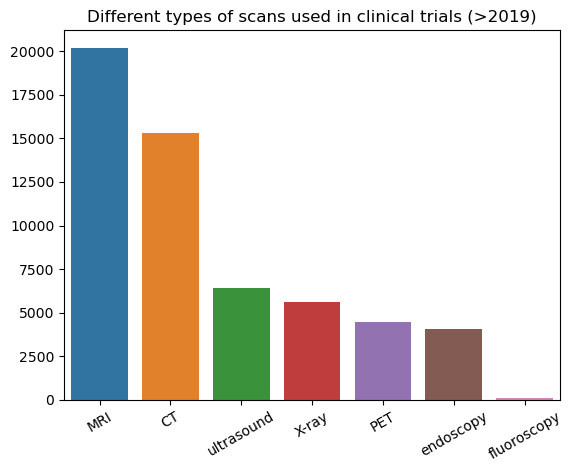

In [12]:
scans_sorted=[x for _,x in sorted(zip(scan_values,scans),reverse=True)]
scan_values_sorted=sorted(scan_values,reverse=True)
plot=sns.barplot(x=scans_sorted, y=scan_values_sorted)
plot.set_xticklabels(plot.get_xticklabels(), rotation=30)
plot.set(title='Different types of scans used in clinical trials (>2019)')

In [13]:
url_all='https://classic.clinicaltrials.gov/api/query/field_values?expr=ALL'
search_elig_crit='+AND+SEARCH[Study](AREA[EligibilityCriteria]'
search_status='+AND+AREA[OverallStatus]'
params=')&field=Condition&fmt=xml'
scan_values_in_progress, scan_values_completed, scan_values_unknown =[],[],[]
for scan in scans_sorted:
    scan_values_in_progress.append(int(pd.read_xml(url_all+search_elig_crit+scan+search_status+
                                                   'NOT+completed+AND+AREA[OverallStatus]NOT+unknown'
                                                   +params).NStudiesFound.dropna()))
    scan_values_completed.append(int(pd.read_xml(url_all+search_elig_crit+scan+search_status+
                                                   'completed'+params).NStudiesFound.dropna()))
    scan_values_unknown.append(int(pd.read_xml(url_all+search_elig_crit+scan+search_status+
                                                   'unknown'+params).NStudiesFound.dropna()))
print(scan_values_in_progress,scan_values_completed,scan_values_unknown,sep='\n')

[15739, 12076, 4372, 3976, 3715, 2849, 67]
[13019, 9855, 4688, 6150, 2170, 3094, 57]
[3886, 3361, 1781, 1293, 621, 1090, 18]


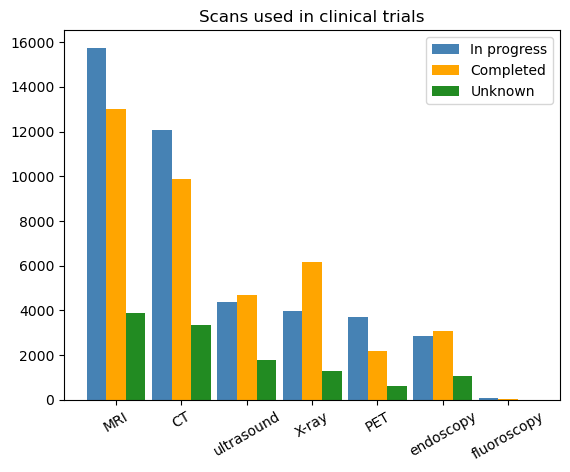

In [14]:
x=np.arange(len(scans_sorted))
plt.bar(x-0.3,scan_values_in_progress , 0.3, label = 'In progress',color='steelblue')
plt.bar(x, scan_values_completed, 0.3, label = 'Completed',color='orange')
plt.bar(x+0.3, scan_values_unknown, 0.3, label = 'Unknown',color='forestgreen')
plt.xticks(x,scans_sorted,rotation=30)
plt.title('Scans used in clinical trials')
plt.legend()
plt.show()

In [174]:
years=range(2016,2024)
search_elig_crit='+AND+SEARCH[Study](AREA[EligibilityCriteria]'
search_status_date='+AND+AREA[OverallStatus]NOT+unknown+AND+AREA[CompletionDate]'
params=')&field=Condition&fmt=xml'

scans_over_time=np.zeros((len(scans),len(years)))
i=0
for i in range(len(scans)):
    for year in years:
        scans_over_time[i][year-2016]=int(pd.read_xml(url_all+search_elig_crit+scans[i]+
                                                  search_status_date+str(year)+params).NStudiesFound.dropna())

scans_over_time

array([[2.500e+02, 2.960e+02, 3.070e+02, 3.280e+02, 2.890e+02, 2.860e+02,
        3.910e+02, 6.070e+02],
       [8.100e+02, 8.320e+02, 8.580e+02, 9.640e+02, 1.026e+03, 1.043e+03,
        1.281e+03, 2.156e+03],
       [3.930e+02, 4.010e+02, 4.270e+02, 4.830e+02, 4.890e+02, 4.890e+02,
        5.930e+02, 1.014e+03],
       [1.210e+03, 1.230e+03, 1.354e+03, 1.420e+03, 1.398e+03, 1.322e+03,
        1.661e+03, 2.951e+03],
       [4.450e+02, 4.370e+02, 4.560e+02, 5.050e+02, 5.000e+02, 5.840e+02,
        5.830e+02, 9.090e+02],
       [2.000e+00, 5.000e+00, 7.000e+00, 5.000e+00, 6.000e+00, 6.000e+00,
        8.000e+00, 1.000e+01],
       [2.300e+02, 2.320e+02, 2.250e+02, 2.870e+02, 2.620e+02, 2.590e+02,
        3.370e+02, 6.820e+02]])

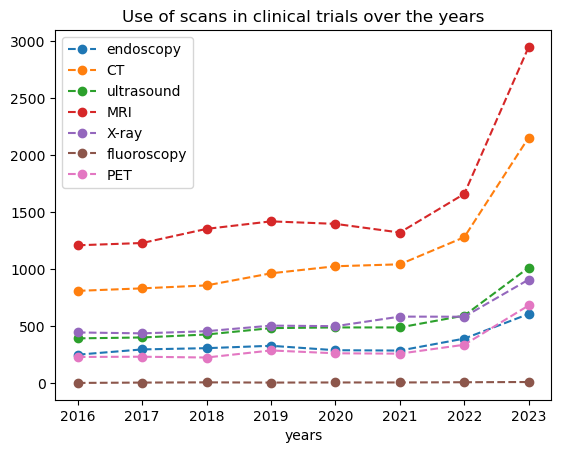

In [19]:
i=0
for scan_type in scans_over_time:
    plt.plot(scan_type,label=scans[i],marker='o',linestyle='--')
    i=i+1
plt.legend()
plt.title('Use of scans in clinical trials over the years')
plt.xlabel('years')
plt.xticks(np.arange(len(years)),years)
plt.show()

In [4]:
body_parts=['brain','heart','liver','eye','stomach','lung','kidney']
url_all='https://classic.clinicaltrials.gov/api/query/field_values?expr=ALL'
search_description='+AND+SEARCH[Study](AREA[DetailedDescription]'
search_date='+AND+AREA[CompletionDate]RANGE[2019,MAX])'
params='&field=Condition&fmt=xml'
body_part_values=[]
for body_part in body_parts:
    body_part_values.append(int(pd.read_xml(url_all+search_description+body_part+search_date+params).NStudiesFound.dropna()))
body_part_values

[11279, 17174, 6163, 4667, 3226, 11503, 8124]

[Text(0.5, 1.0, 'Body parts targeted in clinical trials (>2019)')]

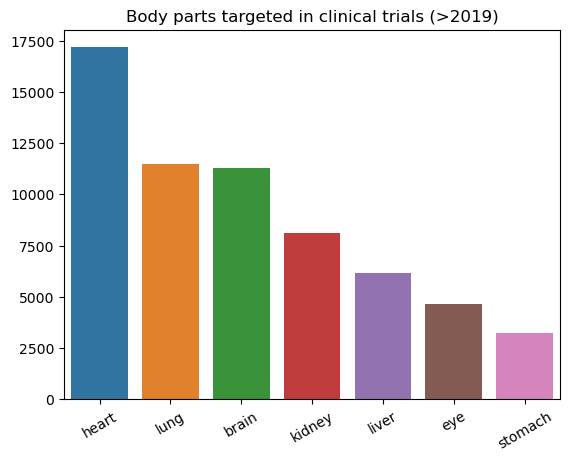

In [16]:
body_parts_sorted=[x for _,x in sorted(zip(body_part_values,body_parts),reverse=True)]
body_part_values_sorted=sorted(body_part_values,reverse=True)
plot=sns.barplot(x=body_parts_sorted, y=body_part_values_sorted)
plot.set_xticklabels(plot.get_xticklabels(), rotation=30)
plot.set(title='Body parts targeted in clinical trials (>2019)')

In [13]:
years=range(2016,2024)
search_description='+AND+SEARCH[Study](AREA[DetailedDescription]'
search_status_date='+AND+AREA[OverallStatus]NOT+unknown+AND+AREA[CompletionDate]'
params=')&field=Condition&fmt=xml'

body_over_time=np.zeros((len(body_parts),len(years)))
i=0
for i in range(len(body_parts)):
    for year in years:
        body_over_time[i][year-2016]=int(pd.read_xml(url_all+search_description+body_parts[i]+
                                                  search_status_date+str(year)+params).NStudiesFound.dropna())

body_over_time

array([[ 681.,  788.,  858.,  961.,  870.,  853., 1100., 1870.],
       [1253., 1346., 1485., 1593., 1567., 1508., 1861., 2908.],
       [ 416.,  410.,  493.,  522.,  516.,  486.,  619.,  958.],
       [ 331.,  405.,  410.,  483.,  430.,  438.,  567.,  800.],
       [ 233.,  230.,  256.,  298.,  264.,  269.,  340.,  445.],
       [ 699.,  729.,  880.,  958., 1026.,  993., 1181., 1825.],
       [ 557.,  598.,  640.,  685.,  731.,  704.,  832., 1278.]])

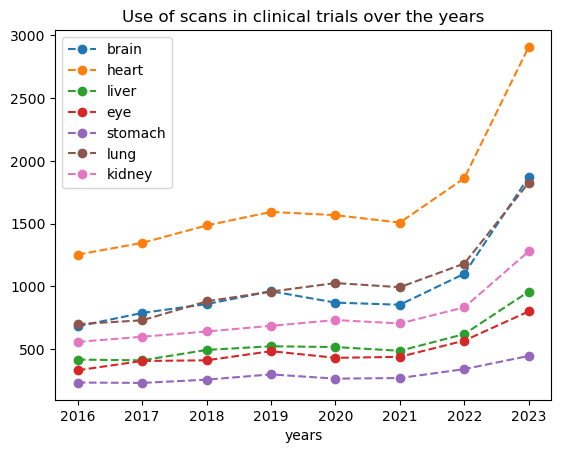

In [16]:
i=0
for body_part in body_over_time:
    plt.plot(body_part,label=body_parts[i],marker='o',linestyle='--')
    i=i+1
plt.legend()
plt.title('Use of scans in clinical trials over the years')
plt.xlabel('years')
plt.xticks(np.arange(len(years)),years)
plt.show()

In [18]:
search_description='+AND+SEARCH[Study](AREA[DetailedDescription]'
search_elig_crit='+AND+AREA[EligibilityCriteria]'
search_date='+AND+AREA[CompletionDate]RANGE[2019,MAX])'
params='&field=Condition&fmt=xml'
body_part_values_endoscopy=[]
body_part_values_MRI=[]
body_part_values_CT=[]
body_part_values_ultrasound=[]
for body_part in body_parts_sorted:
    body_part_values_endoscopy.append(int(pd.read_xml(url_all+search_description+body_part+search_elig_crit+
                                                      'endoscopy'+search_date+params).NStudiesFound.dropna()))
    body_part_values_MRI.append(int(pd.read_xml(url_all+search_description+body_part+search_elig_crit+
                                                      'MRI'+search_date+params).NStudiesFound.dropna()))
    body_part_values_CT.append(int(pd.read_xml(url_all+search_description+body_part+search_elig_crit+
                                                      'CT'+search_date+params).NStudiesFound.dropna()))
    body_part_values_ultrasound.append(int(pd.read_xml(url_all+search_description+body_part+search_elig_crit+
                                                      'ultrasound'+search_date+params).NStudiesFound.dropna()))
    
print(body_part_values_MRI,body_part_values_endoscopy,body_part_values_CT,body_part_values_ultrasound,sep='\n')

[1167, 866, 3403, 561, 767, 242, 241]
[110, 113, 59, 101, 221, 38, 482]
[695, 1476, 801, 550, 609, 94, 371]
[423, 320, 211, 224, 419, 66, 129]


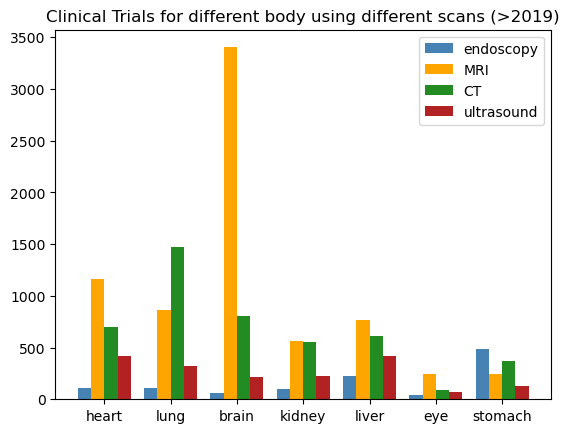

In [19]:
x=np.arange(len(body_parts_sorted))
plt.bar(x-0.3,body_part_values_endoscopy,0.2,label='endoscopy',color='steelblue')
plt.bar(x-0.1,body_part_values_MRI,0.2,label='MRI',color='orange')
plt.bar(x+0.1,body_part_values_CT,0.2,label='CT',color='forestgreen')
plt.bar(x+0.3,body_part_values_ultrasound,0.2,label='ultrasound',color='firebrick')
plt.xticks(x,body_parts_sorted)
plt.title('Clinical Trials for different body using different scans (>2019)')
plt.legend()
plt.show()

In [16]:
ultrasounds=['uterus','obstetric','breast','carotid','musculoskeletal','pelvic','kidney','gallbladder','spleen','pancreas',
             'prostate','scrotum','thyroid','venous','heart','liver','renal','vascular','abdominal','vaginal','rectal']
url_all='https://classic.clinicaltrials.gov/api/query/field_values?expr=ALL'
search_elig_crit='+AND+SEARCH[Study](AREA[EligibilityCriteria]('
search_date=')+AND+AREA[CompletionDate]RANGE[2019,MAX])'
params='&field=Condition&fmt=xml'
ultrasound_values=[]
for ultrasound in ultrasounds:
    if ultrasound=='uterus':
        ultrasound_values.append(int(pd.read_xml(url_all+search_elig_crit+ultrasound+'+ultrasound+OR+'+ultrasound+'+sonography'+
                                                 '+OR+hysterosonography+OR+sonohysterography'+search_date+params
                                                ).NStudiesFound.dropna()))
    elif ultrasound=='heart':
        ultrasound_values.append(int(pd.read_xml(url_all+search_elig_crit+ultrasound+'+ultrasound+OR+'+ultrasound+'+sonography'+
                                                 '+OR+echocardiogram'+search_date+params
                                                ).NStudiesFound.dropna()))
    else:
        ultrasound_values.append(int(pd.read_xml(url_all+search_elig_crit+ultrasound+'+ultrasound+OR+'+ultrasound+'+sonography'+
                                                 search_date+params).NStudiesFound.dropna()))
ultrasound_values

[665,
 62,
 1006,
 215,
 61,
 608,
 1982,
 83,
 101,
 251,
 451,
 5,
 500,
 861,
 4838,
 1909,
 1933,
 753,
 895,
 269,
 221]

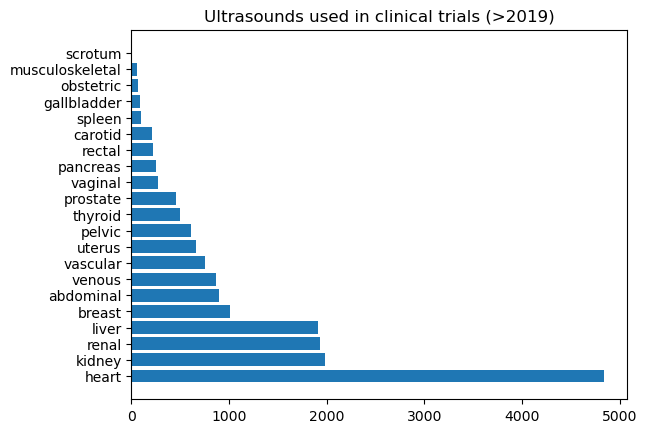

In [17]:
ultrasounds_sorted=[x for _,x in sorted(zip(ultrasound_values,ultrasounds),reverse=True)]
ultrasound_values_sorted=sorted(ultrasound_values,reverse=True)
plt.barh(ultrasounds_sorted,ultrasound_values_sorted)
plt.title('Ultrasounds used in clinical trials (>2019)')
plt.show()